In [1]:
import pyathena as pa
import sys
import os
import os.path as osp
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statistics
import xarray as xr
import _pickle as pickle

sys.path.insert(0,'..')

In [2]:
# in here are stored all the data from the simulation 
data = pa.LoadSim('/home/comejuliet/TIGRESS', verbose = True)

LoadSim-INFO: savdir : /home/comejuliet/TIGRESS
LoadSim-INFO: basedir: /home/comejuliet/TIGRESS
LoadSim-INFO: athinput: /home/comejuliet/TIGRESS/out.txt
LoadSim-INFO: problem_id: R8_8pc_NCRSP
LoadSim-INFO: timeit.txt not found.
LoadSim-INFO: hst: /home/comejuliet/TIGRESS/hst/R8_8pc_NCRSP.hst
LoadSim-INFO: sn: /home/comejuliet/TIGRESS/hst/R8_8pc_NCRSP.sn
LoadSim-INFO: vtk in tar: /home/comejuliet/TIGRESS/vtk nums: 200-390
LoadSim-INFO: starpar_vtk: /home/comejuliet/TIGRESS/starpar nums: 0-438
LoadSim-WARNING: zprof files not found in /home/comejuliet/TIGRESS.
LoadSim-WARNING: rst files not found in /home/comejuliet/TIGRESS.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "

In [3]:
units=data.u

In [4]:
def norm_log_hist_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.bar(edges[:-1],hist,np.diff(edges),align='edge',**kwargs)
def norm_log_line_plot(hist,edges,**kwargs):
    if hist.sum() > 0: 
        plt.plot(edges[:-1]+0.5*np.diff(edges),hist,**kwargs)

In [5]:
def plot_sf_mass_func(sf):

    sp=data.load_starpar_vtk(num=sf)

    plt.ylim(0.5,500)
    plt.xlim(2,7)
    plt.yscale('log')

    if len(sp) >0:
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2)]
            cl_young=sp[(sp.mass > 0) & (sp.flag > -2) & (sp.mage*units.Myr < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.flag == -2)]
        else:
            cl=sp[(sp.mass > 0) & (sp.age < sp.time)]
            cl_young=sp[(sp.mass > 0) & (sp.age < sp.time) & (sp.age*units.Myr < 40)]
            cl_ini=sp[(sp.mass > 0) & (sp.age > sp.time)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units.Msun),range=[2,7],bins=50)
        cl_young_hist,cl_young_edges=np.histogram(np.log10(cl_young.mass*units.Msun),range=[2,7],bins=50)
        cl_ini_hist,cl_ini_edges=np.histogram(np.log10(cl_ini.mass*units.Msun),range=[2,7],bins=50)

        norm_log_hist_plot(cl_ini_hist,cl_ini_edges,alpha=0.5,label='initial clusters',color='C0')
        norm_log_hist_plot(cl_hist,cl_edges,alpha=0.8,label='all new clusters',color='C1')
        norm_log_hist_plot(cl_young_hist,cl_young_edges,label='new young clusters',color='C2')

        plt.text(6.,10,'t={:6.2f}Myr'.format(sp.time*units.Myr))
        #print(sp.time*units.Myr)


In [6]:
def calc_normed_mass_funct(sf,trange=None,bins=50):

    sp=data.load_starpar_vtk(num=sf)

    if len(sp) >0:
        if trange == None:
            t1 = 0
            t2 = sp.time
        else:
            t1,t2 = trange
        birth_time = sp.time-sp.age
        if 'flag' in sp:
            cl=sp[(sp.mass > 0) & (sp.flag > -2) & (birth_time > t1) & (birth_time < t2)]
        else:
            cl=sp[(sp.mass > 0) & (birth_time > t1) & (birth_time < t2)]

        cl_hist,cl_edges=np.histogram(np.log10(cl.mass*units.Msun),range=[2,7],bins=bins)

        return cl_hist, cl_edges, sp.time*units.Myr

LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0200.starpar.vtk. Time: 200.001200
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0210.starpar.vtk. Time: 210.000100


200
210


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0220.starpar.vtk. Time: 220.000400
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0230.starpar.vtk. Time: 230.000300


220
230
240


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0240.starpar.vtk. Time: 240.001400
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0250.starpar.vtk. Time: 250.000600
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0260.starpar.vtk. Time: 260.000500


250
260


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0270.starpar.vtk. Time: 270.000900
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0280.starpar.vtk. Time: 280.000800


270
280
290


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0290.starpar.vtk. Time: 290.000500
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0300.starpar.vtk. Time: 300.000900
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0310.starpar.vtk. Time: 310.001400


300
310
320


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0320.starpar.vtk. Time: 320.001400
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0330.starpar.vtk. Time: 330.000400


330


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0340.starpar.vtk. Time: 340.000800
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0350.starpar.vtk. Time: 350.000600


340
350
360


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0360.starpar.vtk. Time: 360.000100
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0370.starpar.vtk. Time: 370.000200
LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0380.starpar.vtk. Time: 380.000400


370
380


LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0390.starpar.vtk. Time: 390.000300


390


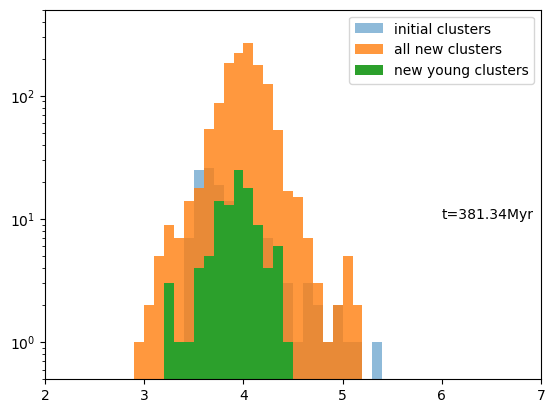

In [7]:
nums = data.nums
npt = len(nums)
for l in range(npt):
    sf = nums[l]
    plt.clf()
    print(sf)
    plot_sf_mass_func(sf)
    plt.legend()

LoadSim-INFO: [load_starpar_vtk]: R8_8pc_NCRSP.0390.starpar.vtk. Time: 390.000300
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


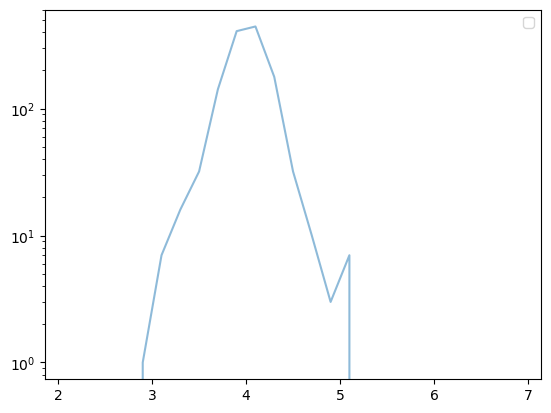

In [10]:
nums = data.nums
npt = len(nums)
sf = nums[19]
cl_hist,cl_edges,time=calc_normed_mass_funct(sf,bins=25)
norm_log_line_plot(cl_hist,cl_edges,alpha=0.5)
plt.legend()
plt.yscale('log')